In [78]:
# Common imports
import numpy as np
import os
import pandas as pd


In [79]:
# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)



In [80]:
# Ignore useless warnings (see SciPy issue #5998)
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

In [81]:
import tensorflow as tf
from tensorflow import keras

In [82]:
tf.__version__

'2.3.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:




In [83]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [84]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is represented as a byte (0 to 255):


In [85]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [86]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

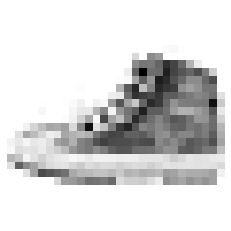

In [87]:
plt.imshow(X_train[2], cmap="binary")
plt.axis('off')
plt.show()

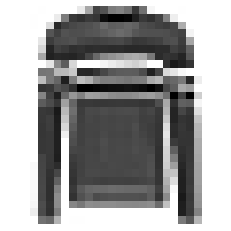

In [88]:
plt.imshow(X_valid[5], cmap="binary")
plt.axis('off')
plt.show()

# Construct a Model

In [89]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [90]:
keras.backend.clear_session()
np.random.seed(42)

In [91]:
model.layers

In [92]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 300)               235500    
_________________________________________________________________
dense_10 (Dense)             (None, 100)               30100     
_________________________________________________________________
dense_11 (Dense)             (None, 10)                1010      
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [93]:
hidden1 = model.layers[1]
hidden1.name

'dense_9'

In [94]:
model.get_layer(hidden1.name) is hidden1

True

In [95]:
weights, biases = hidden1.get_weights()

In [96]:
weights

array([[ 0.01207802, -0.05535754, -0.01771513, ...,  0.01746687,
         0.0133497 ,  0.05383413],
       [ 0.02010391, -0.02706678,  0.02287871, ...,  0.0168227 ,
         0.03347206, -0.06666281],
       [ 0.03914981, -0.00953282, -0.06002529, ..., -0.04614432,
         0.02983787, -0.04922261],
       ...,
       [ 0.03932826,  0.06978491, -0.00274364, ..., -0.00301748,
         0.01711215,  0.02811638],
       [ 0.04803104, -0.06569241,  0.0487215 , ..., -0.02862288,
        -0.05708605,  0.02990717],
       [ 0.00156182, -0.05014411,  0.02629876, ..., -0.01993694,
         0.02330573,  0.02970791]], dtype=float32)

In [97]:
weights.shape

(784, 300)

In [98]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [99]:
biases.shape

(300,)

Here you can chose the loss function, the optimizer, the performance metric, etc. check Keras documentation for further details.


In [100]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [101]:
#Here you can chose how many epochs you need and the batch size.
history = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 3ms/step - loss: 0.7062 - accuracy: 0.7674 - val_loss: 0.5110 - val_accuracy: 0.8278
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4890 - accuracy: 0.8305 - val_loss: 0.4566 - val_accuracy: 0.8428
Epoch 3/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4457 - accuracy: 0.8428 - val_loss: 0.4212 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4185 - accuracy: 0.8529 - val_loss: 0.4004 - val_accuracy: 0.8638
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3970 - accuracy: 0.8608 - val_loss: 0.3818 - val_accuracy: 0.8692
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3818 - accuracy: 0.8659 - val_loss: 0.3811 - val_accuracy: 0.8666
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.3681 - accuracy: 0.8693 - val_loss: 0.3877 - val_accuracy:

In [102]:
history.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

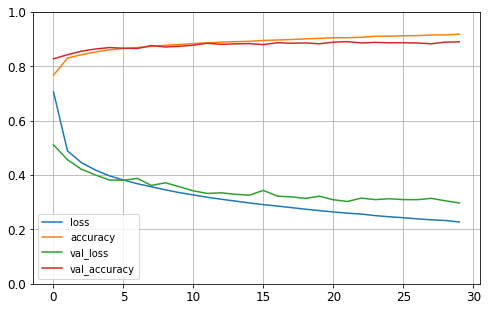

In [103]:
#Plot learning Curves
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [104]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3242 - accuracy: 0.8850


[0.3242228627204895, 0.8849999904632568]

1. Plot Learning curves when using different optimizers

First optimizer ADAM

In [105]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="adam",
              metrics=["accuracy"])

In [106]:
history0 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3787 - accuracy: 0.8604 - val_loss: 0.3386 - val_accuracy: 0.8798
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3331 - accuracy: 0.8778 - val_loss: 0.3350 - val_accuracy: 0.8834
Epoch 3/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3074 - accuracy: 0.8857 - val_loss: 0.3260 - val_accuracy: 0.8844
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2885 - accuracy: 0.8940 - val_loss: 0.3174 - val_accuracy: 0.8840
Epoch 5/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2703 - accuracy: 0.8988 - val_loss: 0.3183 - val_accuracy: 0.8862
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2581 - accuracy: 0.9032 - val_loss: 0.3101 - val_accuracy: 0.8914
Epoch 7/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.2503 - accuracy: 0.9066 - val_loss: 0.3373 - val_accuracy:

In [107]:
history0.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

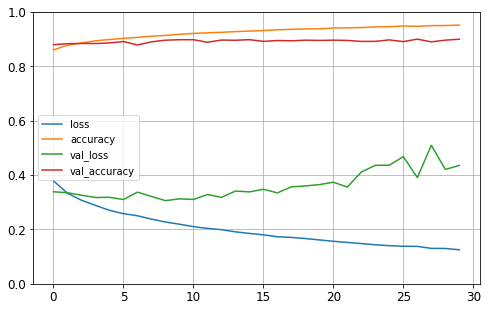

In [108]:
pd.DataFrame(history0.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Second optimizer RMSprop

In [109]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="RMSprop",
              metrics=["accuracy"])

In [110]:
history1 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1243 - accuracy: 0.9529 - val_loss: 0.5623 - val_accuracy: 0.8936
Epoch 2/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1343 - accuracy: 0.9515 - val_loss: 0.5990 - val_accuracy: 0.9012
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.1411 - accuracy: 0.9486 - val_loss: 0.7186 - val_accuracy: 0.8970
Epoch 4/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1455 - accuracy: 0.9487 - val_loss: 0.7448 - val_accuracy: 0.8924
Epoch 5/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1559 - accuracy: 0.9470 - val_loss: 0.7228 - val_accuracy: 0.8936
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1548 - accuracy: 0.9482 - val_loss: 0.7873 - val_accuracy: 0.8936
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.1593 - accuracy: 0.9464 - val_loss: 0.8230 - val_accuracy:

In [111]:
history1.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

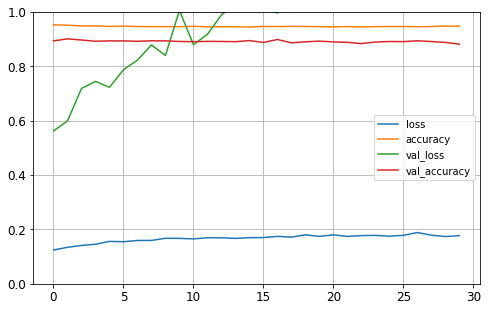

In [112]:
pd.DataFrame(history1.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Third optimizer Nadam

In [113]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="Nadam",
              metrics=["accuracy"])

In [114]:
history2 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2385 - accuracy: 0.9357 - val_loss: 0.9838 - val_accuracy: 0.8838
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.2256 - accuracy: 0.9334 - val_loss: 0.9027 - val_accuracy: 0.8868
Epoch 3/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1901 - accuracy: 0.9390 - val_loss: 1.0024 - val_accuracy: 0.8896
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.1678 - accuracy: 0.9437 - val_loss: 0.7732 - val_accuracy: 0.8950
Epoch 5/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1639 - accuracy: 0.9447 - val_loss: 0.9275 - val_accuracy: 0.8888
Epoch 6/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1629 - accuracy: 0.9457 - val_loss: 0.7985 - val_accuracy: 0.8924
Epoch 7/30
1719/1719 [==============================] - 8s 4ms/step - loss: 0.1452 - accuracy: 0.9499 - val_loss: 0.9151 - val_accuracy

In [115]:
history2.params

{'epochs': 30, 'steps': 1719, 'verbose': 1}

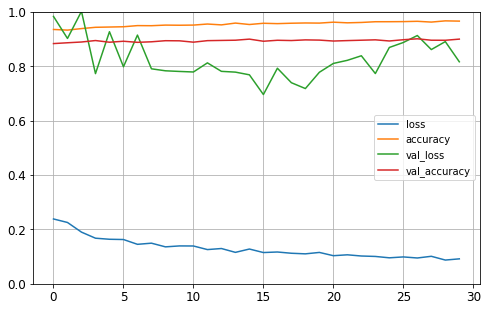

In [116]:
pd.DataFrame(history2.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

2. Plot Learning curves when using different batch size

First batch size is 10

In [117]:
history3 = model.fit(X_train, y_train, batch_size=10, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
5500/5500 [==============================] - 26s 5ms/step - loss: 0.1903 - accuracy: 0.9392 - val_loss: 0.8954 - val_accuracy: 0.8880
Epoch 2/30
5500/5500 [==============================] - 25s 4ms/step - loss: 0.1621 - accuracy: 0.9453 - val_loss: 0.7068 - val_accuracy: 0.8894
Epoch 3/30
5500/5500 [==============================] - 25s 4ms/step - loss: 0.1653 - accuracy: 0.9442 - val_loss: 0.6792 - val_accuracy: 0.8988
Epoch 4/30
5500/5500 [==============================] - 24s 4ms/step - loss: 0.1561 - accuracy: 0.9471 - val_loss: 0.7442 - val_accuracy: 0.8772
Epoch 5/30
5500/5500 [==============================] - 24s 4ms/step - loss: 0.1533 - accuracy: 0.9472 - val_loss: 0.8931 - val_accuracy: 0.8754
Epoch 6/30
5500/5500 [==============================] - 25s 5ms/step - loss: 0.1539 - accuracy: 0.9462 - val_loss: 0.7232 - val_accuracy: 0.8930
Epoch 7/30
5500/5500 [==============================] - 25s 4ms/step - loss: 0.1463 - accuracy: 0.9496 - val_loss: 0.7105 - val_ac

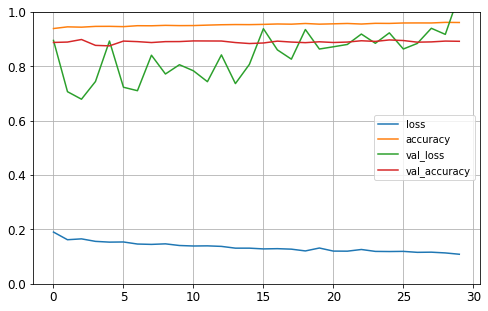

In [118]:
pd.DataFrame(history3.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Second batch size is 40

In [119]:
history4 = model.fit(X_train, y_train, batch_size=40, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.0686 - accuracy: 0.9769 - val_loss: 1.0370 - val_accuracy: 0.9026
Epoch 2/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.0575 - accuracy: 0.9788 - val_loss: 1.0487 - val_accuracy: 0.9014
Epoch 3/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.0599 - accuracy: 0.9779 - val_loss: 1.0933 - val_accuracy: 0.9004
Epoch 4/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.0611 - accuracy: 0.9772 - val_loss: 1.2375 - val_accuracy: 0.8956
Epoch 5/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.0658 - accuracy: 0.9767 - val_loss: 1.0877 - val_accuracy: 0.8988
Epoch 6/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.0562 - accuracy: 0.9793 - val_loss: 1.1271 - val_accuracy: 0.9024
Epoch 7/30
1375/1375 [==============================] - 7s 5ms/step - loss: 0.0608 - accuracy: 0.9776 - val_loss: 1.1382 - val_accuracy:

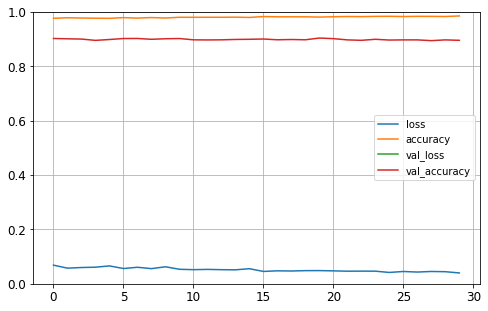

In [120]:
pd.DataFrame(history4.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

3. Plot Learning curves when using different number of epochs

First epoch is 12

In [121]:
history5 = model.fit(X_train, y_train, batch_size=32, epochs=12,
                    validation_data=(X_valid, y_valid))

Epoch 1/12
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0535 - accuracy: 0.9813 - val_loss: 1.4197 - val_accuracy: 0.8958
Epoch 2/12
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0490 - accuracy: 0.9822 - val_loss: 1.5315 - val_accuracy: 0.8976
Epoch 3/12
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0456 - accuracy: 0.9832 - val_loss: 1.4403 - val_accuracy: 0.9006
Epoch 4/12
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0469 - accuracy: 0.9835 - val_loss: 1.4560 - val_accuracy: 0.8972
Epoch 5/12
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0406 - accuracy: 0.9853 - val_loss: 1.3340 - val_accuracy: 0.8974
Epoch 6/12
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0434 - accuracy: 0.9836 - val_loss: 1.4249 - val_accuracy: 0.8970
Epoch 7/12
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0493 - accuracy: 0.9834 - val_loss: 1.4664 - val_accuracy:

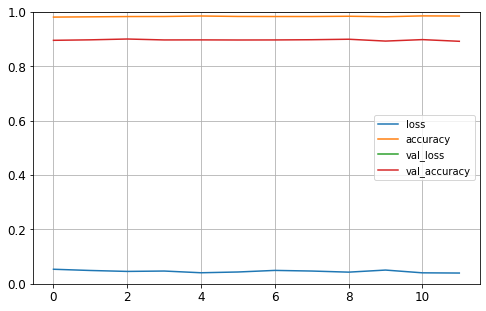

In [122]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

Second epoch is 44

In [123]:
history5 = model.fit(X_train, y_train, batch_size=32, epochs=44,
                    validation_data=(X_valid, y_valid))

Epoch 1/44
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0446 - accuracy: 0.9844 - val_loss: 1.5253 - val_accuracy: 0.8990
Epoch 2/44
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0439 - accuracy: 0.9845 - val_loss: 1.3857 - val_accuracy: 0.8978
Epoch 3/44
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0420 - accuracy: 0.9849 - val_loss: 1.4612 - val_accuracy: 0.8956
Epoch 4/44
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0457 - accuracy: 0.9834 - val_loss: 1.5864 - val_accuracy: 0.8912
Epoch 5/44
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0386 - accuracy: 0.9867 - val_loss: 1.5875 - val_accuracy: 0.8944
Epoch 6/44
1719/1719 [==============================] - 8s 4ms/step - loss: 0.0391 - accuracy: 0.9853 - val_loss: 1.5132 - val_accuracy: 0.8912
Epoch 7/44
1719/1719 [==============================] - 7s 4ms/step - loss: 0.0431 - accuracy: 0.9845 - val_loss: 1.4382 - val_accuracy:

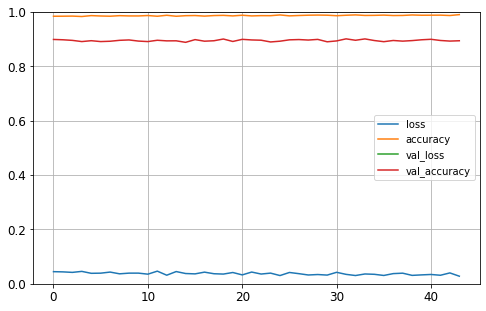

In [124]:
pd.DataFrame(history5.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

 4.Add additional neurons and use Dropout Layer. Plot Learning curves.

In [125]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add((keras.layers.Dropout(0.6)))
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(70, activation="softmax"))

In [126]:
model.layers

In [127]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 400)               314000    
_________________________________________________________________
dropout (Dropout)            (None, 400)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 150)               60150     
_________________________________________________________________
dense_2 (Dense)              (None, 70)                10570     
Total params: 384,720
Trainable params: 384,720
Non-trainable params: 0
_________________________________________________________________


In [133]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [134]:
history7 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.9633 - accuracy: 0.6745 - val_loss: 0.5847 - val_accuracy: 0.7944
Epoch 2/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6010 - accuracy: 0.7901 - val_loss: 0.4877 - val_accuracy: 0.8260
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.5314 - accuracy: 0.8105 - val_loss: 0.4497 - val_accuracy: 0.8418
Epoch 4/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4905 - accuracy: 0.8263 - val_loss: 0.4102 - val_accuracy: 0.8614
Epoch 5/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4668 - accuracy: 0.8339 - val_loss: 0.3995 - val_accuracy: 0.8622
Epoch 6/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4456 - accuracy: 0.8406 - val_loss: 0.3830 - val_accuracy: 0.8676
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4299 - accuracy: 0.8462 - val_loss: 0.3745 - val_accuracy:

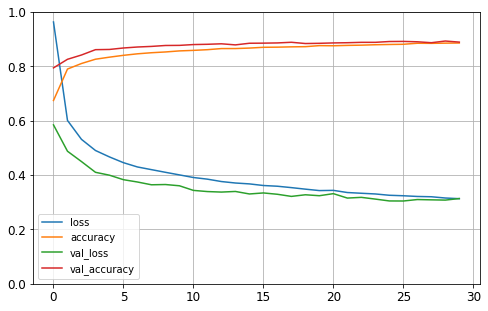

In [135]:
pd.DataFrame(history7.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

5.Use Batch Normalisation

In [136]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(400, activation="relu"))
model.add((keras.layers.Dropout(0.6)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(150, activation="relu"))
model.add(keras.layers.Dense(70, activation="softmax"))

In [137]:
model.layers

In [138]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 400)               314000    
_________________________________________________________________
dropout_1 (Dropout)          (None, 400)               0         
_________________________________________________________________
batch_normalization (BatchNo (None, 400)               1600      
_________________________________________________________________
dense_4 (Dense)              (None, 150)               60150     
_________________________________________________________________
dense_5 (Dense)              (None, 70)                10570     
Total params: 386,320
Trainable params: 385,520
Non-trainable params: 800
______________________________________________

In [139]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [140]:
history8 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.8379 - accuracy: 0.7273 - val_loss: 0.4758 - val_accuracy: 0.8320
Epoch 2/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.5688 - accuracy: 0.7939 - val_loss: 0.4340 - val_accuracy: 0.8412
Epoch 3/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.5231 - accuracy: 0.8103 - val_loss: 0.4037 - val_accuracy: 0.8560
Epoch 4/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4979 - accuracy: 0.8193 - val_loss: 0.3918 - val_accuracy: 0.8570
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.4794 - accuracy: 0.8253 - val_loss: 0.3759 - val_accuracy: 0.8620
Epoch 6/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4704 - accuracy: 0.8289 - val_loss: 0.3742 - val_accuracy: 0.8638
Epoch 7/30
1719/1719 [==============================] - 6s 4ms/step - loss: 0.4622 - accuracy: 0.8322 - val_loss: 0.3832 - val_accuracy:

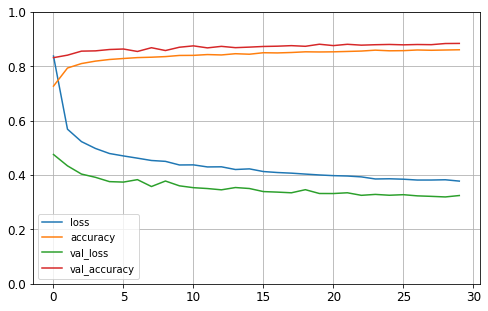

In [141]:
pd.DataFrame(history8.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

6. Repeat with more layers

In [142]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(100, activation="relu"))
model.add((keras.layers.Dropout(0.3)))
model.add(keras.layers.BatchNormalization())
model.add(keras.layers.Dense(255, activation="relu"))
model.add(keras.layers.Dense(85, activation="tanh"))
model.add(keras.layers.Dense(36, activation="relu"))
model.add(keras.layers.Dense(12, activation="softmax"))

In [143]:
model.layers

In [144]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_2 (Flatten)          (None, 784)               0         
_________________________________________________________________
dense_6 (Dense)              (None, 100)               78500     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 100)               400       
_________________________________________________________________
dense_7 (Dense)              (None, 255)               25755     
_________________________________________________________________
dense_8 (Dense)              (None, 85)                21760     
_________________________________________________________________
dense_9 (Dense)              (None, 36)               

In [145]:
model.compile(loss="sparse_categorical_crossentropy",
              optimizer="sgd",
              metrics=["accuracy"])

In [146]:
history9 = model.fit(X_train, y_train, batch_size=32, epochs=30,
                    validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.8288 - accuracy: 0.7174 - val_loss: 0.4704 - val_accuracy: 0.8326
Epoch 2/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.5301 - accuracy: 0.8107 - val_loss: 0.4023 - val_accuracy: 0.8560
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4802 - accuracy: 0.8255 - val_loss: 0.3905 - val_accuracy: 0.8628
Epoch 4/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4585 - accuracy: 0.8346 - val_loss: 0.3732 - val_accuracy: 0.8622
Epoch 5/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4344 - accuracy: 0.8422 - val_loss: 0.3547 - val_accuracy: 0.8684
Epoch 6/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4264 - accuracy: 0.8457 - val_loss: 0.3506 - val_accuracy: 0.8754
Epoch 7/30
1719/1719 [==============================] - 4s 2ms/step - loss: 0.4099 - accuracy: 0.8509 - val_loss: 0.3425 - val_accuracy:

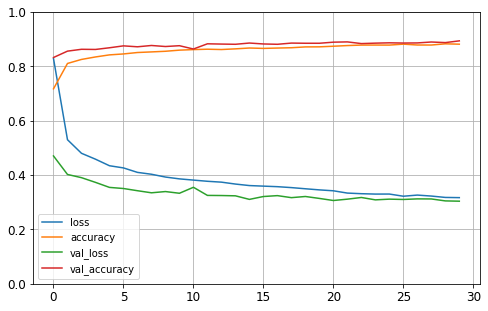

In [147]:
pd.DataFrame(history9.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()